# Цель

Изучение библиотек обработки данных Pandas и PandaSQL.

# Задание

Условие задания - https://nbviewer.jupyter.org/github/Yorko/mlcourse_open/blob/master/jupyter_english/assignments_demo/assignment01_pandas_uci_adult.ipynb?flush_cache=true

Набор данных можно скачать здесь - https://archive.ics.uci.edu/ml/datasets/Adult


# Описание датасета

Unique values of all features (for more information, please see the links above):

* age: continuous.
* workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* fnlwgt: continuous.
* education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* education-num: continuous.
* marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* sex: Female, Male.
* capital-gain: continuous.
* capital-loss: continuous.
* hours-per-week: continuous.
* native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
* salary: >50K,<=50K

In [1]:
import pandas as pd
import pandasql as ps
from datetime import datetime
import seaborn
import matplotlib.pyplot as plt

# we don't like warnings
# you can comment the following 2 lines if you'd like to
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('data/adult.data.txt', sep=', ', engine='python')
data.head()

age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country salary  
0          2174             0              40  United-States  <=50K  
1             0             0              13  United-States  <=50K  
2             0             0              40  United-States  <=50K  
3             0             0              40  United-States  <=50K  
4             0             0              40           Cuba  <=50K

# Часть 1
## Задание 1

How many men and women (sex feature) are represented in this dataset?

In [3]:
data['sex'].value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

## Задание 2

What is the average age (age feature) of women?

In [4]:
data.loc[data['sex'] == 'Female', 'age'].mean()

36.85823043357163

## Задание 3
What is the percentage of German citizens (native-country feature)?

In [5]:
print("{:.6f}%".format(data.loc[data['native-country'] == 'Germany','native-country'].count() / data.shape[0] *100))

float((data['native-country'] == 'Germany').sum()) / data.shape[0] * 100

0.420749%


0.42074874850281013

## Задание 4-5
What are the mean and standard deviation of age for those who earn more than 50K per year (salary feature) and those who earn less than 50K per year?

In [6]:
smore50 = data.loc[data['salary'] == '>50K', 'age']
sless50 = data.loc[data['salary'] == '<=50K', 'age']

print('more then 50K: avg = {:.2f}  std = {:.2f}'.format(smore50.mean(), smore50.std()))
print('less then 50K: avg = {:.2f}  std = {:.2f}'.format(sless50.mean(), sless50.std()))

more then 50K: avg = 44.25  std = 10.52
less then 50K: avg = 36.78  std = 14.02


## Задание 6
Is it true that people who earn more than 50K have at least high school education? (education – Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters or Doctorate feature)

In [7]:
data.loc[(data['salary'] == '>50K'), 'education'].unique() #No

array(['HS-grad', 'Masters', 'Bachelors', 'Some-college', 'Assoc-voc',
       'Doctorate', 'Prof-school', 'Assoc-acdm', '7th-8th', '12th',
       '10th', '11th', '9th', '5th-6th', '1st-4th'], dtype=object)

## Задание 7
Display age statistics for each race (race feature) and each gender (sex feature). Use groupby() and describe(). Find the maximum age of men of Amer-Indian-Eskimo race.

In [8]:
data.loc[data["sex"] == "Male"].groupby(["race"])["age"].describe()

count       mean        std   min   25%   50%   75%  \
race                                                                        
Amer-Indian-Eskimo    192.0  37.208333  12.049563  17.0  28.0  35.0  45.0   
Asian-Pac-Islander    693.0  39.073593  12.883944  18.0  29.0  37.0  46.0   
Black                1569.0  37.682600  12.882612  17.0  27.0  36.0  46.0   
Other                 162.0  34.654321  11.355531  17.0  26.0  32.0  42.0   
White               19174.0  39.652498  13.436029  17.0  29.0  38.0  49.0   

                     max  
race                      
Amer-Indian-Eskimo  82.0  
Asian-Pac-Islander  90.0  
Black               90.0  
Other               77.0  
White               90.0

## Задание 8
Among whom is the proportion of those who earn a lot (>50K) greater: married or single men (marital-status feature)? Consider as married those who have a marital-status starting with Married (Married-civ-spouse, Married-spouse-absent or Married-AF-spouse), the rest are considered bachelors.

In [9]:
smaritalstatus = data.loc[(data['sex'] == 'Male')]['marital-status'].value_counts().to_frame()
smaritalstatus = smaritalstatus.rename(columns={'marital-status': 'count'})
smaritalstatus['marital-status'] = smaritalstatus.index
smaritalstatus.reset_index(drop=True)

count         marital-status
0  13319     Married-civ-spouse
1   5916          Never-married
2   1771               Divorced
3    394              Separated
4    213  Married-spouse-absent
5    168                Widowed
6      9      Married-AF-spouse

In [10]:
countOfMarried = smaritalstatus.loc[smaritalstatus['marital-status'].isin(['Married-civ-spouse', 
                                   'Married-spouse-absent', 
                                   'Married-AF-spouse'])]["count"].sum()
countOfNotMarried = smaritalstatus.loc[~smaritalstatus['marital-status'].isin(['Married-civ-spouse', 
                                   'Married-spouse-absent', 
                                   'Married-AF-spouse'])]["count"].sum()
print("Married={} \nNot married={}".format(countOfMarried, countOfNotMarried))

Married=13541 
Not married=8249


## Задание 9
What is the maximum number of hours a person works per week (hours-per-week feature)? How many people work such a number of hours, and what is the percentage of those who earn a lot (>50K) among them?

In [11]:
smaxload = data.loc[data['hours-per-week'] == data['hours-per-week'].max()]
totalmax = smaxload.shape[0]
print("Max time - {} hours/week".format(smaxload['hours-per-week'].max()))
print("Total - {:.2f}%".format(smaxload.loc[smaxload['salary'] == '>50K'].shape[0] / totalmax * 100))
print(">50K - {:.2f}%".format(smaxload.loc[smaxload['salary'] == '>50K'].shape[0] / totalmax * 100))

Max time - 99 hours/week
Total - 29.41%
>50K - 29.41%


## Задание 10
Count the average time of work (hours-per-week) for those who earn a little and a lot (salary) for each country (native-country). What will these be for Japan?


In [12]:
for (country, salary), sub_df in data.groupby(['native-country', 'salary']):
    print(country, salary, round(sub_df['hours-per-week'].mean(), 2))

? <=50K 40.16
? >50K 45.55
Cambodia <=50K 41.42
Cambodia >50K 40.0
Canada <=50K 37.91
Canada >50K 45.64
China <=50K 37.38
China >50K 38.9
Columbia <=50K 38.68
Columbia >50K 50.0
Cuba <=50K 37.99
Cuba >50K 42.44
Dominican-Republic <=50K 42.34
Dominican-Republic >50K 47.0
Ecuador <=50K 38.04
Ecuador >50K 48.75
El-Salvador <=50K 36.03
El-Salvador >50K 45.0
England <=50K 40.48
England >50K 44.53
France <=50K 41.06
France >50K 50.75
Germany <=50K 39.14
Germany >50K 44.98
Greece <=50K 41.81
Greece >50K 50.62
Guatemala <=50K 39.36
Guatemala >50K 36.67
Haiti <=50K 36.33
Haiti >50K 42.75
Holand-Netherlands <=50K 40.0
Honduras <=50K 34.33
Honduras >50K 60.0
Hong <=50K 39.14
Hong >50K 45.0
Hungary <=50K 31.3
Hungary >50K 50.0
India <=50K 38.23
India >50K 46.48
Iran <=50K 41.44
Iran >50K 47.5
Ireland <=50K 40.95
Ireland >50K 48.0
Italy <=50K 39.62
Italy >50K 45.4
Jamaica <=50K 38.24
Jamaica >50K 41.1
Japan <=50K 41.0
Japan >50K 47.96
Laos <=50K 40.38
Laos >50K 40.0
Mexico <=50K 40.0
Mexico >50K 46

# Часть 2
Выполнить следующие запросы с использованием двух различных библиотек - Pandas и PandaSQL:

* один произвольный запрос на соединение двух наборов данных
* один произвольный запрос на группировку набора данных с использованием функций агрегирования

Сравнить время выполнения каждого запроса в Pandas и PandaSQL.

In [13]:
import pandasql as ps
from datetime import datetime

### Пример 1

In [14]:
# Подготовка данных для Join
jdata = data
jdata['id'] = jdata.index
jdatap1  = jdata.iloc[:, 0:4]
jdatap1['id'] = jdata.index
jdatap2 = jdata.iloc[:, 5:]

# data1 = data[:15500]
# data2 = 
# data2 = data[15500:31000].iloc[:, 1:4]

In [15]:
def example1_group_pandasql(dataset1, dataset2):
    join_query = '''
    SELECT *
    FROM dataset1 ds1
    JOIN dataset2 ds2 ON ds1.id = ds2.id
     '''
    return ps.sqldf(join_query, locals())

def example1_group_panda(dataset1, dataset2):
    return pd.merge(dataset1, dataset2, on='id')

### Пример 2

In [16]:
def example2_group_pandasql(dataset):
    simple_query = '''
        SELECT 
            education,
            COUNT('hours-per-week') as avg_hours
        FROM dataset as df
        GROUP BY education
        '''
    return ps.sqldf(simple_query, locals())

def example2_group_panda(dataset):
    return data.groupby(["education"])["age"].count().to_frame()
## data.loc[data["sex"] == "Male"].groupby(["race"])["age"].describe()

## Тесты

In [17]:
import time

def count_mean_time(func, params, N =5):
    total_time = 0
    for i in range(N):
        time1 = time.time()
        if len(params) == 1:
            tmp_df = func(params[0])
        elif len(params) == 2:
            tmp_df = func(params[0], params[1])
        time2 = time.time()
        total_time += (time2 - time1)
    return total_time/N

### Пример 1

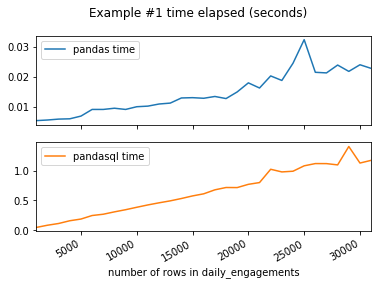

In [18]:
ex1_times  = []
for count in range(1000, 32000, 1000):
    pandasql_time = count_mean_time(example1_group_pandasql, [jdatap1[:count], jdatap2[:count]])
    pandas_time = count_mean_time(example1_group_panda, [jdatap1[:count], jdatap2[:count]])
    ex1_times.append({'count': count, 'pandasql_time': pandasql_time, 'pandas_time': pandas_time})
ex1_times_df = pd.DataFrame(ex1_times)

ex1_times_df.columns = ['number of rows in daily_engagements', 'pandas time', 'pandasql time']
ex1_times_df = ex1_times_df.set_index('number of rows in daily_engagements')    
ax = ex1_times_df.plot(title = 'Example #1 time elapsed (seconds)', subplots = True)

### Пример 2

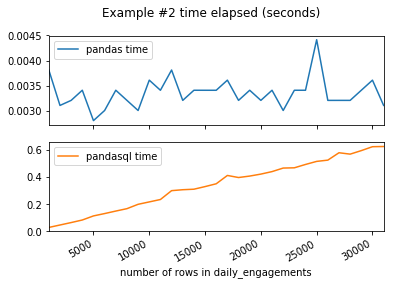

In [19]:
ex2_times  = []
for count in range(1000, 32000, 1000):
    pandasql_time = count_mean_time(example2_group_pandasql, [data[:count]])
    pandas_time = count_mean_time(example2_group_panda, [data[:count]])
    ex2_times.append({'count': count, 'pandasql_time': pandasql_time, 'pandas_time': pandas_time})
ex2_times_df = pd.DataFrame(ex2_times)

ex2_times_df.columns = ['number of rows in daily_engagements', 'pandas time', 'pandasql time']
ex2_times_df = ex2_times_df.set_index('number of rows in daily_engagements')    
ax = ex2_times_df.plot(title = 'Example #2 time elapsed (seconds)', subplots = True)